In [4]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA

from collections import Counter
pd.set_option('display.precision', 3)

In [5]:
# Extra imports
from numpy.random import  uniform,normal
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from numpy.random import multivariate_normal
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
from time import time
from datetime import timedelta
from sklearn.model_selection import train_test_split,  KFold, cross_val_score


In [6]:
df = pd.read_csv('exploitation/motos_after_preprocessing_real_data.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'exploitation/motos_after_preprocessing_real_data.csv'

In [5]:
#df.drop(['Unnamed: 0', 'model', 'id', 'brand', 'year', 'fuel', 'price', 'licence', 'cc', 'type', 'km', 'hpw', 'year_cat', 'hpw_cat', 'km_cat', 'price_cat'], axis=1, inplace=True)

In [6]:
df.shape

(39586, 44)

In [ ]:
'''
sns.pairplot(
        df,
        height=2,
        plot_kws={"s": 2, "alpha": 0.2}
    );
'''

In [7]:
df.columns

Index(['brand_id', 'days_stock', 'fuel_1', 'fuel_2', 'fuel_3', 'type_1',
       'type_2', 'type_3', 'type_4', 'type_5', 'type_6', 'type_7', 'type_8',
       'type_9', 'type_10', 'cc_1', 'cc_2', 'cc_3', 'cc_4', 'cc_5', 'cc_6',
       'cc_7', 'cc_8', 'hpw_heavyweight', 'hpw_lightweight',
       'hpw_middleweight', 'km_0-10000', 'km_10000-20000', 'km_20000-30000',
       'km_30000-40000', 'km_40000-50000', 'km_50000-70000', 'price_0-2000',
       'price_10000-11000', 'price_2000-4000', 'price_4000-6000',
       'price_6000-8000', 'price_8000-10000', 'licence_1', 'licence_2',
       'licence_3', 'licence_4', 'price_std', 'km_std'],
      dtype='object')

In [8]:
y=df['days_stock']
X=df.drop(columns='days_stock')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=0)

In [13]:
K = 3

In [19]:
kmeans_3 = KMeans(n_clusters=K,max_iter=100)
kmeans_3.fit(df.loc[:,['price_std','days_stock']]);
df['knn_labels'] = kmeans_3.labels_

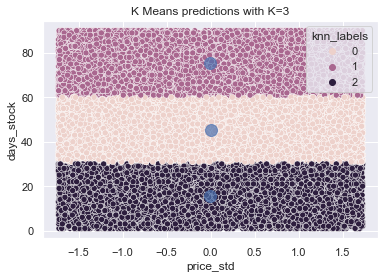

In [20]:
sns.scatterplot(x='price_std', 
               y='days_stock',
               hue='knn_labels',
               data=df);
plt.plot(kmeans_3.cluster_centers_[:,0], 
         kmeans_3.cluster_centers_[:,1], 
         'bo', markersize=12,alpha=0.7);

plt.title('K Means predictions with K=3');

In [22]:
index= pd.MultiIndex.from_arrays([['kmeans'], [3]], names=('model', 'K'))

results_df = pd.DataFrame(index=index, columns= ['CH score', 'Silhouette score', 'DB score'])

In [23]:
CH_3 = calinski_harabasz_score(df.loc[:,['price_std','days_stock']], 
                              kmeans_3.labels_ )

results_df.loc[('kmeans',3), 'CH score'] = CH_3
results_df

,,CH score,Silhouette score,DB score
model,K,,,
kmeans,3,156223.284,NaN,NaN


In [24]:
S_3 = silhouette_score(df.loc[:,['price_std','days_stock']], 
                              kmeans_3.labels_ )

results_df.loc[('kmeans', 3), 'Silhouette score'] = S_3
results_df

,,CH score,Silhouette score,DB score
model,K,,,
kmeans,3,156223.284,0.584,NaN


In [25]:
DB_3 = davies_bouldin_score(df.loc[:,['price_std','days_stock']], 
                              kmeans_3.labels_ )

results_df.loc[('kmeans', 3), 'DB score'] = DB_3
results_df

,,CH score,Silhouette score,DB score
model,K,,,
kmeans,3,156223.284,0.584,0.508


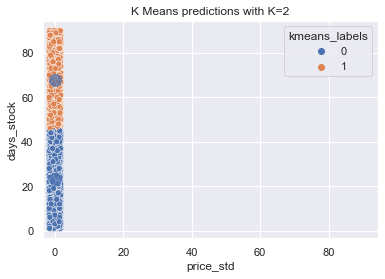

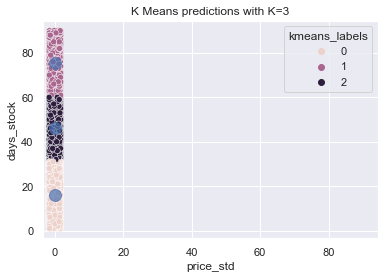

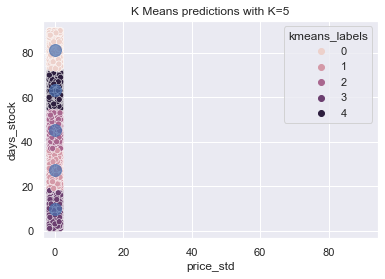

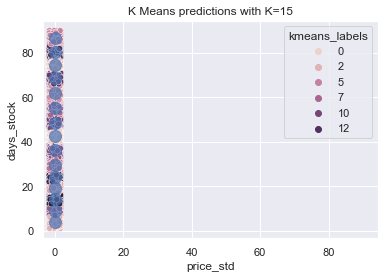

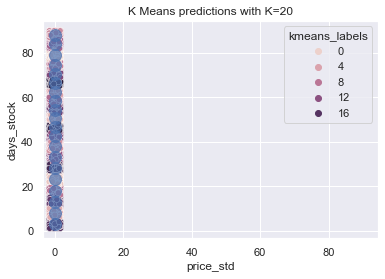

In [27]:
def compute_clustering_and_plot(K, data, results):
    # Train the model
    kmeans = KMeans(n_clusters=K,max_iter=100)
    kmeans.fit(df.loc[:,['price_std','days_stock']]);
    data['kmeans_labels'] = kmeans.labels_
    # Plot results
    sns.scatterplot(x='price_std', 
               y='days_stock',
               hue='kmeans_labels', 
               data=data);
    plt.plot(kmeans.cluster_centers_[:,0], 
         kmeans.cluster_centers_[:,1], 
         'bo', markersize=12,alpha=0.7);

    plt.xlim(plt.ylim());
    
    plt.title('K Means predictions with K={}'.format(K));
    plt.show();
    # Compute metrics
    CH = calinski_harabasz_score(df.loc[:,['price_std','days_stock']], 
                              kmeans.labels_ )
    S = silhouette_score(df.loc[:,['price_std','days_stock']], 
                              kmeans.labels_ )
    
    DB = davies_bouldin_score(df.loc[:,['price_std','days_stock']], 
                              kmeans.labels_ )
    
    results.loc[('kmeans', k),:] = [CH,S,DB]
    return results


K_values = [2,3,5,15,20]


for k in K_values:
    results = compute_clustering_and_plot(k, df,results_df)

In [28]:
results_df

CH score Silhouette score DB score
model  K                                       
kmeans 3    155976.07            0.583    0.508
       2   117598.977            0.623    0.506
       5   229217.325            0.546    0.521
       15  467958.104            0.462    0.622
       20  519436.713            0.431    0.686

Text(0.5, 1.0, 'Ground Truth')

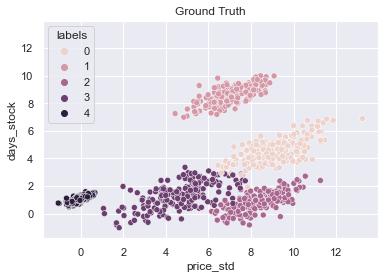

In [29]:
np.random.seed(0)


K =5
N=1000
center = np.array((0,0))
dispersion = 25

mu_k= multivariate_normal(center, np.eye(2)*dispersion,K)
pi_k = uniform(0.2,1.5,size=K)
data, labels = make_blobs(n_samples=N, 
                          n_features=2, 
                          centers=mu_k, 
                          cluster_std=pi_k)

# Rotate and scale
lineal_transform =  np.array([[1,0.4],[0.2,0.6]])

data = np.dot(data, lineal_transform) 
mu_k= np.dot(mu_k, lineal_transform)


data = pd.DataFrame(data, columns=['price_std', 'days_stock'])
data['labels']=labels
sns.scatterplot(x='price_std', y='days_stock',hue='labels', data=data)

plt.ylim(plt.xlim())

plt.title('Ground Truth')

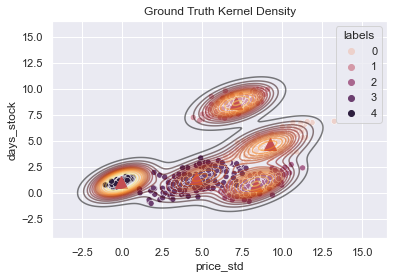

In [31]:
sns.scatterplot(x='price_std', y='days_stock',hue='labels', data=data);
plt.title('Ground Truth Kernel Density');

plt.plot(mu_k[:,0], mu_k[:,1], 
         'r^', markersize=12);
p = sns.kdeplot(x='price_std', y='days_stock', data=data,
            n_levels=15,cmap='afmhot',alpha=0.5);
plt.ylim(plt.xlim());

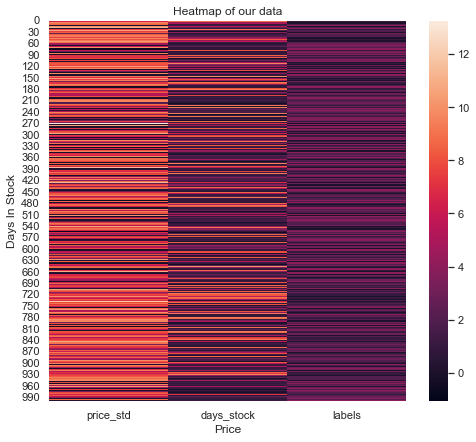

In [36]:
plt.figure(figsize=(8,7));
sns.heatmap(data);
plt.title('Heatmap of our data');
plt.xlabel('Price');
plt.ylabel('Days In Stock');

In [38]:
pca = PCA();
# We scale the data to improve PCA performance. 
pca.fit(minmax_scale(data));
components = np.sum(np.cumsum(pca.explained_variance_ratio_) <= 0.9)
print('If we maintain 90% of the variance we obtain {} components'.format(components))
pca = PCA(n_components=components);
data_pca = pca.fit_transform(minmax_scale(data));

print('Original shape:', data.shape,'New shape:',data_pca.shape)

If we maintain 90% of the variance we obtain 1 components
Original shape: (1000, 3) New shape: (1000, 1)


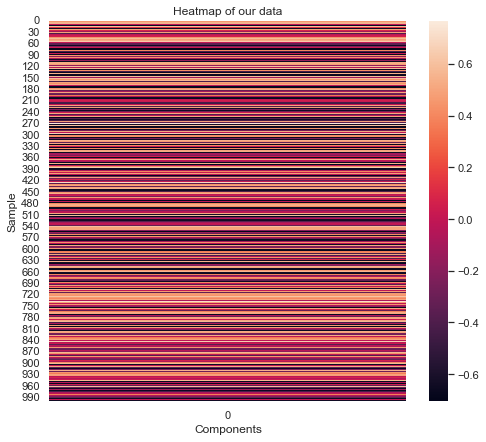

In [39]:
plt.figure(figsize=(8,7));
sns.heatmap(data_pca);
plt.title('Heatmap of our data');
plt.xlabel('Components');
plt.ylabel('Sample');